# Распознавание дефектов дорожного покрытия

## Введение

![](https://fthmb.tqn.com/9H6cVhjNBfUmsCI2Oy4U4hQMk6Q=/300x200/filters:saturation(0.2):brightness(10):contrast(5):no_upscale()/3509673328_9b7ed82212_b-5705a84d3df78c7d9e953054.jpg)

Бетон, возможно, является наиболее широко используемым строительным материалом во всем мире и одним из самых важных материалов в гражданском строительстве, в том числе используемым для строительства дорог. Прочность – одна из основных причин, по которой бетон используется для строительства на протяжении многих десятилетий. Он способен легко справляться с нагрузками, связанными с растяжением и сжатием, не подвергаясь воздействию. Бетон исключительно прочен и может прослужить долгие годы, поскольку выдерживает суровые погодные условия и стихийные бедствия, является жестким и устойчивым к деформации. Эти характеристики, однако, приводят к тому, что бетонные конструкции не обладают гибкостью и не способны противостоять изменениям окружающей среды. Появление трещин обычно является первым признаком повреждения бетона. Однако возможно ухудшение состояния до появления более глубоких дефектов.

## Постановка задачи

Трещины на поверхности бетона являются серьезным дефектом для любых гражданских конструкций (не только дорог, но и зданий, мостов и т. д.), которые, если не будут вовремя устранены, не только приведут к пагубному влиянию на конструктивное состояние и долговечность, но и могут вызвать настоящие крупномасштабные бедствия, в том числе катастрофы с летальным исходом. Чтобы в дальнейшем избежать несчастных случаев, необходимо регулярно проводить проверки различных бетонных конструкций. Структурный осмотр проводится для оценки жесткости и прочности конструкции на разрыв. Обычно это делается путем проверки бетона на наличие трещин. В зависимости от состояния покрытия принимается решение о замене поврежденного участка новым. Для выявления трещин, выбоин, повреждений стыков и иных дефектов, которые нарушают целостность и прочность дорожного полотна, необходимо разработать автоматизированную систему, которая сможет эффективно распознавать наличие дефектов.

## Цель проекта
Создание модели глубокого обучения с использованием алгоритма сверточной нейронной сети (CNN), которая будет оповещать о дефектах в бетоне. Сверточная нейронная сеть – это класс глубоких нейронных сетей, наиболее часто применяемый для анализа визуальных образов. В работе используется Keras – это программная библиотека с открытым исходным кодом, которая предоставляет интерфейс Python для искусственных нейронных сетей, в частности, сверточных.


## Методология

Необходимо решить задачу классификации изображений, которая включает в себя предоставление изображения в качестве входных данных для модели, построенной с использованием определенного алгоритма, который выводит метку класса, или вероятность класса, к которому принадлежит это изображение. Такой процесс относится к обучению с учителем. Алгоритм сверточной нейронной сети в основном используется для визуальных образов. Модель CNN состоит из двух основных слоев. Первая часть состоит из сверточных слоев и слоев пулинга, в которых происходит основной процесс извлечения признаков. Во второй части полносвязные слои выполняют несколько нелинейных преобразований извлеченных признаков и действуют как часть классификатора.


## Набор данных

Для решения поставленной задачи в работе предлагается использовать набор данных от компании Mendeley, состоящий из изображений, половина из которых содержит трещины в бетоне. Датасет был опубликован 23 июня 2019 г., данные собирались в различных зданиях кампусов Ближневосточного технического университета. Оригинальных собранных изображений с трещинами в бетоне в указанном наборе всего 2000, но для того, чтобы получить модель с хорошей производительностью, обобщением на ранее неизученные экземпляры данных и высокой точностью, такого количества данных недостаточно. Кроме того, разрешение исходных изображений составляет 1024 × 1024 пикселей, что приведет к слишком большим накладным расходам памяти при использовании экземпляров набора в качестве входных данных модели. По этой причине все изображения из входного набора данных были сжаты до размера 227 × 227 пикселей, а набор данных был искусственно увеличен до 40 000 экземпляров. Датасет разделен на две части: «отрицательные» (не содержащие дефектов) и «положительные» (с дефектами) изображения бетона, по 20 000 цветных (RGB) изображений каждого класса. Таким образом, для распознавания дефектов необходимо решить задачу бинарной классификации.

Ссылка: https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip

## Подключение необходимых библиотек

In [2]:
pip install opencv-python

In [3]:
# OpenCV-Python – это библиотека Python для решения задач компьютерного зрения в реальном времени

In [4]:
import cv2 as cv                                                        # Метод cv2.imshow() используется для того, чтобы отобразить изображение в окне, которое автоматически подстраивается под размер изображения
import numpy as np                                                      # Математические операции над массивами 
import pandas as pd                                                     # Простые в использовании структуры данных и инструменты анализа данных с открытым исходным кодом
import matplotlib.pyplot as plt                                         # Библиотека построения графиков вроде MATLAB
import seaborn as sns                                                   # Использует Matplotlib для построения графиков
from pathlib import Path                                                # Функция для использования рабочих файлов и каталогов
from sklearn.model_selection import train_test_split                    # Используется для разбиения набора на обучающую и тестовую выборки
from keras.models import Sequential                                     # Позволяет создавать модели нейронных сетей слой за слоем в пошаговом режиме
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout     # Позволяет создавать слои, которые являются основными строительными блоками нейронных сетей в Keras
import tensorflow as tf                                                 # Нейросетевая библиотека для работы с нейронными сетями
import keras                                                            # Оболочка над Tensorflow
from sklearn.metrics import confusion_matrix, classification_report     # Матрица ошибок и метрики модели 
from tensorflow.keras import datasets, layers, models                   # Наборы данных, слои и предварительно обученные модели из Tensorflow

In [5]:
from keras.preprocessing.image import img_to_array                      # Преобразовывает экземпляр изображения в numpy-массив
from matplotlib import pyplot                                           # Упрощение использования Matplotlib для построения графиков
from numpy import expand_dims                                           # Добавляет новую ось к массиву
from keras.preprocessing.image import ImageDataGenerator                # Генерация новых изображений для аугментации данных

## Загрузка набора данных

In [6]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip
!ls

--2022-01-12 00:08:30--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.106.11
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.106.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240847944 (230M) [application/octet-stream]
Saving to: ‘5y9wdsg2zt-2.zip’

5y9wdsg2zt-2.zip    100%[===================>] 229.69M  27.4MB/s    in 9.1s    

2022-01-12 00:08:39 (25.2 MB/s) - ‘5y9wdsg2zt-2.zip’ saved [240847944/240847944]

5y9wdsg2zt-2.zip  sample_data


In [7]:
!unzip -qq -o 5y9wdsg2zt-2.zip
!ls

 5y9wdsg2zt-2.zip  'Concrete Crack Images for Classification.rar'   sample_data


In [8]:
!unrar x 'Concrete Crack Images for Classification.rar'
!ls

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracting  Negative/15004.jpg                                            88%  OK 
Extracting  Negative/15005.jpg                                            88%  OK 
Extracting  Negative/15006.jpg                                            88%  OK 
Extracting  Negative/15007.jpg                                            88%  OK 
Extracting  Negative/15008.jpg                                            88%  OK 
Extracting  Negative/15009.jpg                                            88%  OK 
Extracting  Negative/15010.jpg                                            88%  OK 
Extracting  Negative/15011.jpg                                            88%  OK 
Extracting  Negative/15012.jpg                                            88%  OK 
Extracting  Negative/15013.jpg                                            88%  OK 
Extracting  

In [9]:
import os
positive_dir  = os.listdir('Positive/')
print("Изображений с дефектами дорожного полотна: ", len(positive_dir))

negative_dir = os.listdir('Negative/')
print("Изображений без дефектов дорожного полотна: ", len(negative_dir))

Изображений с дефектами дорожного полотна:  20000
Изображений без дефектов дорожного полотна:  20000


## Создание датафрейма (таблицы)

In [10]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

Вызывается функция generate_df, которая принимает image_dr и метки в качестве аргументов и возвращает таблицу данных.

Оан создает две серии: пути к файлам, представляющие image_dir всех изображений в папке, и метки классов, которые являются либо отрицательными, либо положительными в зависимости от того, содержит ли изображение дефект

Функция возвращает датафрейм после объединения двух датафреймов по оси = 1.

In [11]:
# Объединяет два датафрейма – positive_df и negative_df с положительными и отрицательными метками классов
positive_df = generate_df(Path('Positive/'), label="POSITIVE")
negative_df = generate_df(Path('Negative/'), label="NEGATIVE")

all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
all_df

,Filepath,Label
0,Positive/16386_1.jpg,POSITIVE
1,Positive/12797_1.jpg,POSITIVE
2,Positive/01775.jpg,POSITIVE
3,Negative/17822.jpg,NEGATIVE
4,Positive/17215_1.jpg,POSITIVE
...,...,...
39995,Positive/14971_1.jpg,POSITIVE
39996,Negative/17196.jpg,NEGATIVE
39997,Positive/18497_1.jpg,POSITIVE
39998,Positive/09862.jpg,POSITIVE


## Предварительный анализ данных

In [14]:
# Первые пять строк итогового набора
df1 = all_df
df1.head()

,Filepath,Label
0,Positive/16386_1.jpg,POSITIVE
1,Positive/12797_1.jpg,POSITIVE
2,Positive/01775.jpg,POSITIVE
3,Negative/17822.jpg,NEGATIVE
4,Positive/17215_1.jpg,POSITIVE


In [15]:
# Последние пять строк
df1.tail()

,Filepath,Label
39995,Positive/14971_1.jpg,POSITIVE
39996,Negative/17196.jpg,NEGATIVE
39997,Positive/18497_1.jpg,POSITIVE
39998,Positive/09862.jpg,POSITIVE
39999,Negative/06129.jpg,NEGATIVE


In [16]:
# Случайная выборка из 10 строк
df1.sample(10)

,Filepath,Label
12836,Negative/11236.jpg,NEGATIVE
10913,Negative/09969.jpg,NEGATIVE
4214,Negative/15742.jpg,NEGATIVE
8198,Positive/18358_1.jpg,POSITIVE
31403,Positive/18137_1.jpg,POSITIVE
13917,Positive/17218_1.jpg,POSITIVE
27440,Negative/01971.jpg,NEGATIVE
11667,Negative/01921.jpg,NEGATIVE
29616,Positive/16815_1.jpg,POSITIVE
39864,Negative/05722.jpg,NEGATIVE


In [17]:
# Проверка пропущенных значений
df1.isnull().sum()

Filepath    0
Label       0
dtype: int64

In [18]:
# Форма данных
df1.shape

(40000, 2)

Таким образом, в наборе данных нет пропущенных значений. Данные включают в себя 40 000 изображений, которые разделены на два класса

## Разбиение данных на обучающую и тестовую выборку

In [19]:
np.random.seed(0) # гарантирует псевдослучайность набора

# Данные перемешиваются и разделяются в отношении 80% : 20%
train_df, test_df = train_test_split(df1,
    train_size=0.8,
    shuffle=True,
    random_state=1
)

In [20]:
# Размер обучающей выборки
train_df.shape

(32000, 2)

In [21]:
# Размер тестовой выборки
test_df.shape

(8000, 2)

## Предварительная обработка и аугментация изображений

Аугментация данных — это методы, используемые для увеличения объема данных путем добавления слегка измененных копий уже существующих экземпляров или вновь созданных синтетических данных из имеющихся.

Вариации включают:
Обрезка, дополнение, отражение по горизонтали и вертикали, сдвиг, вращение, масштабирование и смещение по горизонтали и вертикали

### Преимущества аугментации данных:
– Улучшение производительности и способности модели к обобщению
– Требуется гораздо меньше усилий при создании набора данных (небольшой набор данных легко превращается в огромный набор)
– Снижает переобучение за счет увеличения разнообразия
– Помогает повысить точность предсказания модели

### Недостаток аугментации данных:
Может потребоваться много времени для создания изображений

In [22]:
# Инициализация генераторов для обучающих и тестовых данных
# Параметр масштабирования обеспечивает диапазон входных данных на отрезке [0, 1]
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.10,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale = 1./255,
)

Исходные изображения состоят из коэффициентов RGB в диапазоне 0-255, но такие значения были бы слишком высокими для обработки моделью (учитывая скорость обучения), поэтому лучше использовать целевые значения между 0 и 1, а не путем масштабирования с делением на 255.

## Создание генератора с размером мини-выборки 64

### Обучающая выборка

In [23]:
# Создание генераторов с размером мини-выборки в 64 изображения
# train_df содержит входные классы
# Здесь это «Positive» (положительный) и «Negative» (отрицательный), 
# поэтому class_mode (тип возвращаемых меток классов) – категориальный
# Целевой размер - это размер входных изображений, каждое изображение будет изменено до этого размера
# shuffle: перемешивать ли данные. По умолчанию True. Если установлено значение False, данные сортируются в алфавитно-цифровом порядке.
# batch_size: Размер мини-выборки данных. По умолчанию: 32.
# Цветовой режим: RGB
# Размер мини-выборки определяет количество экземпляров, которые будут распространяться по сети на каждой эпохе обучения

train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (120, 120),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 64,
    shuffle = True,
    seed = 42,
    subset = 'training'
)

Found 28800 validated image filenames belonging to 2 classes.


In [24]:
# Можно получить словарь, который сопоставляет метки классов с индексом 
# вектора предсказания модели, который является выходным
label_map1 = (train_data.class_indices)
label_map1

{'NEGATIVE': 0, 'POSITIVE': 1}

### Валидационная выборка

In [25]:
val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 3200 validated image filenames belonging to 2 classes.


In [26]:
label_map2 = (val_data.class_indices)
label_map2

{'NEGATIVE': 0, 'POSITIVE': 1}

### Тестовая выборка

In [27]:
test_data = test_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False,
    seed=42
)

Found 8000 validated image filenames belonging to 2 classes.


In [28]:
label_map3 = (test_data.class_indices)
label_map3

{'NEGATIVE': 0, 'POSITIVE': 1}

## Визуализация

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Количество объектов каждого класса')

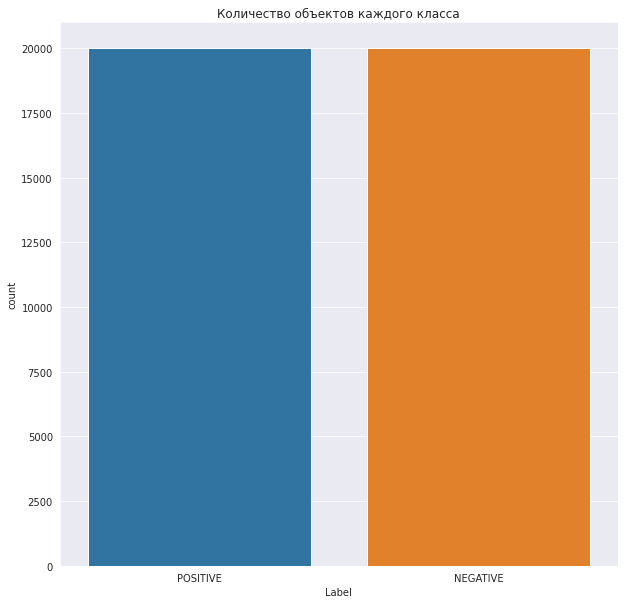

In [29]:
plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(df1['Label'])
plt.title("Количество объектов каждого класса")

## Отобразить первые 10 изображений из обучающей выборки

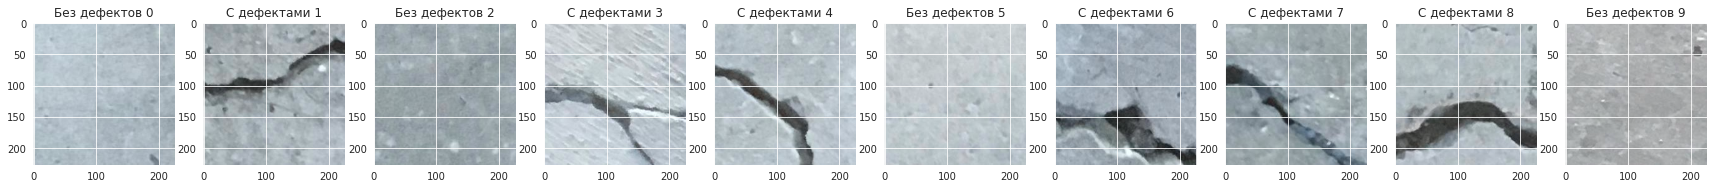

In [30]:
fig, a =  plt.subplots(1,10)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(10):
    img = cv.imread(str(train_df.iloc[i]['Filepath']))
    a[i].imshow(img)
    if train_df.iloc[i]['Label'] == 'POSITIVE':
        title = "С дефектами " + str(i)
    else:
        title = "Без дефектов " + str(i)
    a[i].set_title(title)

## Отобразить первые 10 изображений из тестовой выборки

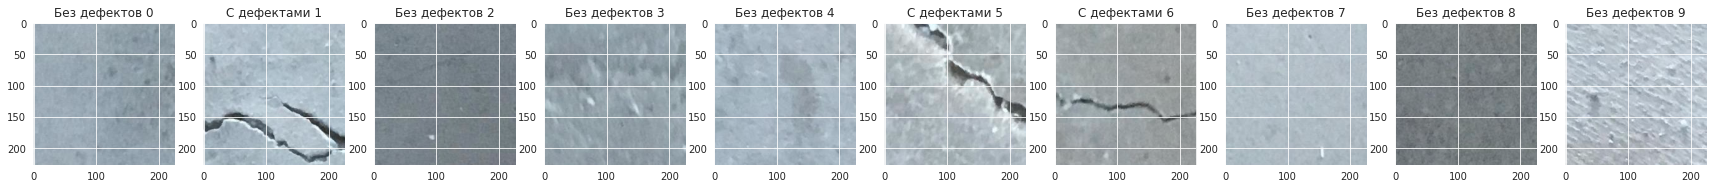

In [31]:
fig,a =  plt.subplots(1,10)
fig.set_figheight(30)
fig.set_figwidth(30)
for i in range(10):
    img = cv.imread(str(test_df.iloc[i]['Filepath']))
    a[i].imshow(img)
    if test_df.iloc[i]['Label']=='POSITIVE':
        title = "С дефектами " + str(i)
    else:
        title="Без дефектов " + str(i)
    a[i].set_title(title)

## Отдельное изображение из обучающей выборки

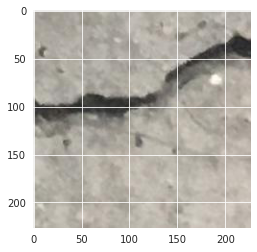

In [32]:
from keras.preprocessing.image import load_img
img = load_img(train_df.iloc[1]['Filepath'])
plt.imshow(img)

## Случайный поворот
Техника поворота изображения позволяет модели создавать изображения с разной ориентацией. Класс ImageDataGenerator в Keras использует эту технику для создания случайно повернутых изображений.

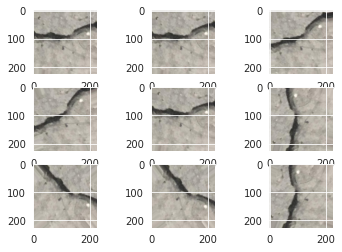

In [33]:
# Преобразовать изображение в массив для дальнейшей обработки
data = img_to_array(img)
# Увеличить размерность data на 1 образец и сохранить в samples
samples = expand_dims(data, 0)
# Вызвать ImageDataGenerator для аугментации изображений
datagen = ImageDataGenerator(rotation_range=90)
# Создать итератор для генератора
it = datagen.flow(samples, batch_size=1)
# В цикле (9 итераций): 
for i in range(9):
    # Создать график 3 x 3 
    pyplot.subplot(330 + 1 + i)
    # Сгенерировать изображение
    batch = it.next()
    # Сохранить в массиве беззнаковых целых для просмотра
    image = batch[0].astype('uint8')
    # Добавить на график
    pyplot.imshow(image)
# Отобразить график
pyplot.show()

## Случайные сдвиги

Техника случайных сдвигов помогает улучшить те изображения, которые расположены неправильно. Может существовать сценарий, при котором они не находятся не в центре. ImageDataGenerator использует параметр height_shift_range для вертикального смещения изображения, а для горизонтального смещения изображения можно использовать width_shift_range. Значения указываются в виде процентов или целых чисел.

### Случайный горизонтальный сдвиг

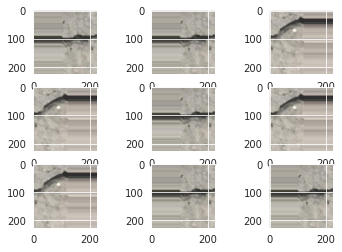

In [34]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-100,100]) # генератор с определением диапазона общей ширины сдвига [-100, +100]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

### Случайный вертикальный сдвиг

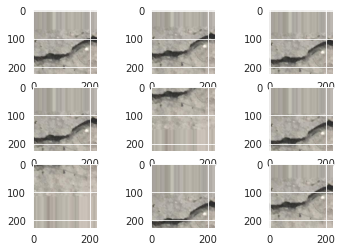

In [35]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=0.5) # высота сдвига – 0.5
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Случайные переворачивания 

Еще один полезный метод выполнения аугментации — переворачивание изображений. ImageDataGenerator помогает переворачивать изображения по горизонтали или по вертикали.

### Горизонтальные перевороты
Используется аргумент horizontal_flip

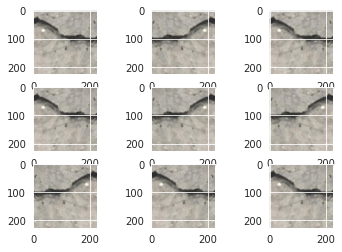

In [36]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

### Вертикальные перевороты
Используется аргумент vertical_flip

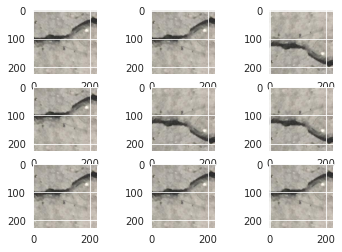

In [37]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Случайная яркость

Четвертая разновидность аугментации — изменение яркости изображений. Это самый полезный метод, так как в большинстве случаев изображения имеют низкую или почти нулевую яркость. Таким образом, можно обучать модель на изображениях, сгенерированных с использованием уже имеющихся. Для управления яркостью изображений с помощью ImageDataGenerator есть аргумент, называемый brightness_range (диапазон яркости). Для этого параметра отрицательные значения приведут к затемнению изображений, тогда как положительные значения сделают изображения яркими.

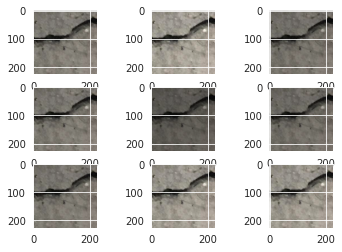

In [38]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.2,1.0]) # диапазон изменения яркости - [0,2...1,0]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Случайный зум 

Для увеличения масштаба следует использовать значения меньше 1, для уменьшения – больше 1. Эта операция увеличения и уменьшения масштаба реализуется с использованием аргумента zoom_range.

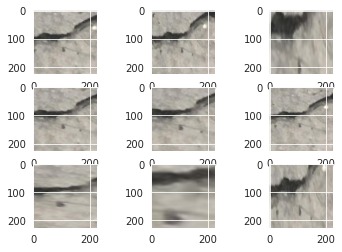

In [39]:
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.1,1.0]) # изменение размеров изображения – от 0,1 до 1,0 от исходного
it = datagen.flow(samples, batch_size=1)
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
pyplot.show()

## Создание модели CNN

CNN состоит из нескольких слоев нейронов. Слои в основном включают сверточные слои и слои пулинга. Сверточный слой содержит набор фильтров, параметры которых необходимо изучить нейронной сети. Размерность фильтров меньше, чем размерность входных данных. Каждый фильтр выполняет операцию свертки на входном слое для вычисления карты признаков.

## Создание сверточных слоев

Последовательная модель позволяет создавать модели слой за слоем поэтапно.

В качестве входных данных CNN принимает тензоры вида "высота изображения, ширина изображения, каналы цвета".

Цветовая модель – RGB. 

Размерность – (120, 120, 3), где image_height (высота изображения) — 120, image_width (ширина изображения) — 120, а каналов цвета — 3

Функция активации — это математические «ворота» между входом, питающим текущий нейрон, и его выходом, идущим к следующему слою. Они решают, должен ли нейрон быть активирован или нет.

Функция активации ReLU широко используется и является выбором по умолчанию, поскольку дает лучшие результаты. RеLU распространена, потому что она прост в реализации и эффективна для преодоления ограничений других ранее популярных функций активации (проблема затухающего градиента). Она менее восприимчива к затухающим градиентам, которые мешают обучению глубоких моделей – по мере добавления в нейронные сети большего количества слоев, использующих определенные функции активации, градиенты функции потерь приближаются к нулю, что затрудняет обучение сети.

### Слой Conv2D
Keras Conv2D — это слой 2D-свертки, который создает ядро, выполняющее свертку с входными данными для создания нового тензора (выходных данных). Обязательный параметр Conv2D — это количество фильтров, при помощи которых будут обучаться сверточные слои. Другие параметры – размер ядра и функция активации.

### Слой пулинга
Слои пулинга используются для уменьшения размерности карты признаков. Таким образом, это уменьшает количество параметров обучения и объем вычислений, выполняемых в сети.
Пулинг максимума представляет собой операцию, которая выбирает максимальный элемент из области карты признаков, охватываемой фильтром.

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))

In [41]:
# вывод информации о модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

Выход каждого слоя Conv2D и MaxPooling2D представляет собой трехмерный тензор "высота, ширина, каналы". Размеры ширины и высоты имеют тенденцию уменьшаться по мере того, как сеть становится все более глубокой. Количество выходных каналов для каждого слоя Conv2D является первым аргументом. Как правило, по мере уменьшения ширины и высоты можно добавлять больше выходных каналов в каждый слой Conv2D.

## Добавление полносвязных слоев

Чтобы завершить модель, достаточно передать последний выходной тензор из сверточного слоя (26, 26, 32) в один или несколько полносвязных слоев для выполнения классификации. Эти слои принимают в качестве входных данных векторы (которые являются одномерными), а текущий вывод представляет собой трехмерный тензор. Сначала необходимо выполнить сглаживание (Flatten), преобразовав 3D-выход в 1D, а затем добавить один или несколько полносвязных слоев. В имеющемся наборе данных есть 2 выходных класса, поэтому на выходном слое используется 2 нейрона по каждому из них.

In [42]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

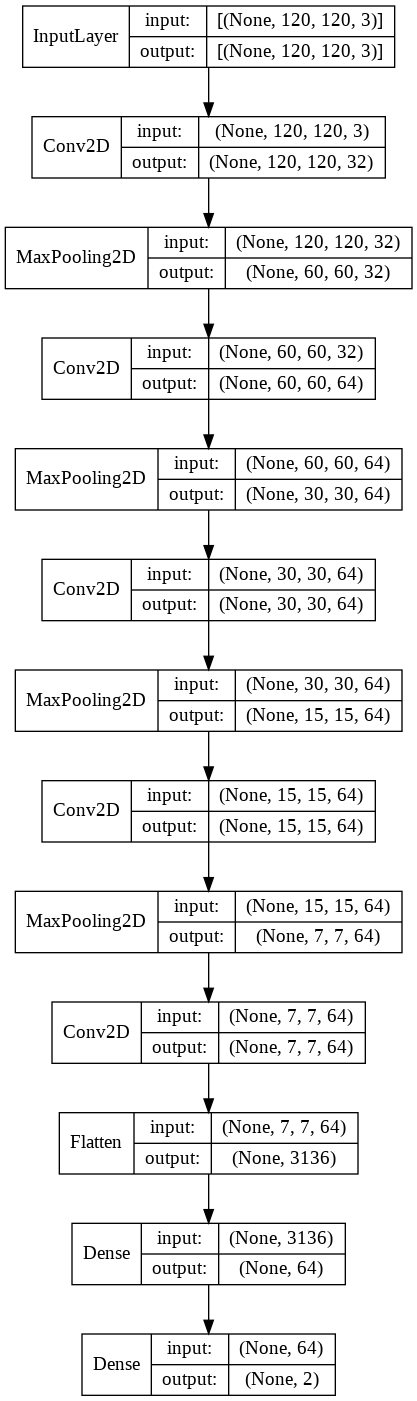

In [44]:
# визуализация построенной модели
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_image.png', show_layer_names=False, show_shapes=True)

## Компиляция и обучение модели

После того, как модель создана, она компилируется с помощью оптимизатора Adam, одного из самых популярных алгоритмов оптимизации. Кроме того, указывается тип функции потерь, который представляет собой категориальную кросс-энтропию, используемую для решения задач многоклассовой классификации. Бинарная кросс-энтропия также может использоваться в качестве функции потерь. Наконец, в качестве метрики указывается точность, которую необходимо проанализировать во время обучения модели.

### Оптимизатор
Оптимизатор Adam в среднем работает лучше других оптимизаторов.
### Функция потерь
Поскольку метки являются категориальными, функция потерь является категориальной кросс-энтропией. Она используется в качестве функции потерь для модели классификации с несколькими классами, где есть две или более выходных метки.
### Метрики
В качестве основной метрики выбрана точность, которую можно увеличить, добавив количество эпох.

In [45]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Обучение модели
Модель обучается с помощью Keras-функции fit() в течение 5 эпох. Функция fit() возвращает объект history – записывается результат этой функции в "историю", которая используется для построения графиков функций точности и потерь на обучающем и валидационном наборе данных, что позволяет визуально проанализировать производительность модели.

In [52]:
history = model.fit(train_data, validation_data = val_data, batch_size=64, epochs=5)

Epoch 1/5
450/450 [==============================] - 154s 342ms/step - loss: 0.0168 - accuracy: 0.9957 - val_loss: 0.0227 - val_accuracy: 0.9947
Epoch 2/5
450/450 [==============================] - 154s 341ms/step - loss: 0.0148 - accuracy: 0.9962 - val_loss: 0.0197 - val_accuracy: 0.9953
Epoch 3/5
450/450 [==============================] - 154s 342ms/step - loss: 0.0146 - accuracy: 0.9962 - val_loss: 0.0117 - val_accuracy: 0.9969
Epoch 4/5
450/450 [==============================] - 154s 342ms/step - loss: 0.0152 - accuracy: 0.9960 - val_loss: 0.0113 - val_accuracy: 0.9975
Epoch 5/5
450/450 [==============================] - 154s 343ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.0127 - val_accuracy: 0.9969


Наблюдая за точностью на обучающей выборке и имеющимися потерями, можно сказать, что модель проделала хорошую работу, поскольку после 1 эпохи точность обучения составляет 99%, а потери довольно низкие.

### Точность на обучающей выборке: 99.69%      Потери на обучающей выборке: 1.27%

### Проверка модели на тестовой выборке

In [53]:
(ls, acc) = model.evaluate(test_data)

125/125 [==============================] - 11s 89ms/step - loss: 0.0122 - accuracy: 0.9976


In [54]:
print('Точность модели = {} %'.format(acc * 100), '. Величина ошибки = {} %'.format(ls * 100))

Точность модели = 99.76249933242798 % . Величина ошибки = 1.2228925712406635 %


### Точность на тестовой выборке: 99.8    Потери на тестовой выборке: 1.22%

## Визуализация точности и потерь модели
Представить оценку модели в перспективе можно, построив графики точности и потерь на данных обучающей и валидационной выборки:

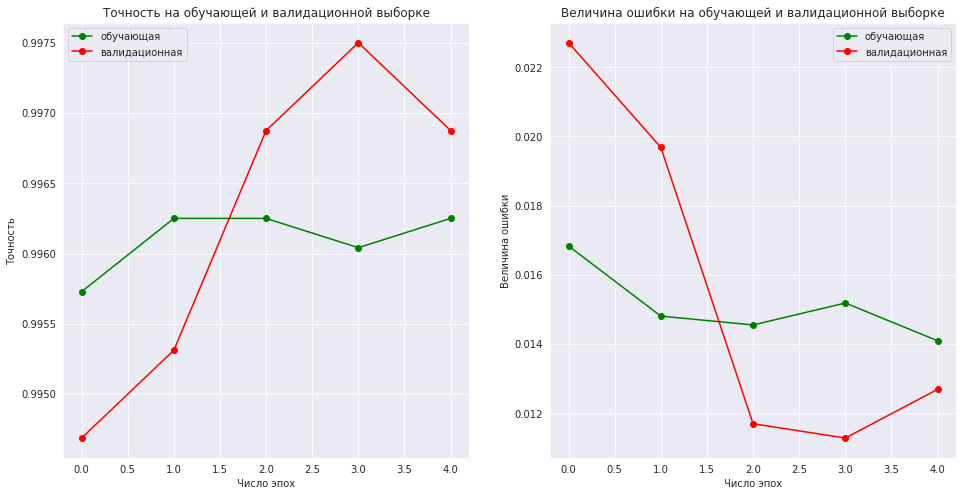

In [57]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,8)

ax[0].plot(epochs , train_acc , 'go-' , label = 'обучающая')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'валидационная')
ax[0].set_title('Точность на обучающей и валидационной выборке')
ax[0].legend()
ax[0].set_xlabel("Число эпох")
ax[0].set_ylabel("Точность")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'обучающая')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'валидационная')
ax[1].set_title('Величина ошибки на обучающей и валидационной выборке')
ax[1].legend()
ax[1].set_xlabel("Число эпох")
ax[1].set_ylabel("Величина ошибки")
plt.show()

In [58]:
# Словарь, который сопоставляет метки классов с индексом вектора предсказания, который получается в качестве вывода при использовании
label_map = (test_data.class_indices)
label_map

{'NEGATIVE': 0, 'POSITIVE': 1}

## Предсказание меток

In [59]:
y_pred1 = model.predict(test_data)
y_pred1

array([[9.9984646e-01, 1.5353854e-04],
       [9.5827517e-21, 1.0000000e+00],
       [9.9981731e-01, 1.8276648e-04],
       ...,
       [3.6073082e-17, 1.0000000e+00],
       [9.9988425e-01, 1.1579595e-04],
       [9.9930894e-01, 6.9108332e-04]], dtype=float32)

In [60]:
y_pred1 = model.predict(test_data)
y_pred2 = np.argmax(np.round(y_pred1),axis=1)
y_pred2

array([0, 1, 0, ..., 1, 0, 0])

## Матрица ошибок модели

In [61]:
cm = confusion_matrix(test_data.labels, y_pred2)

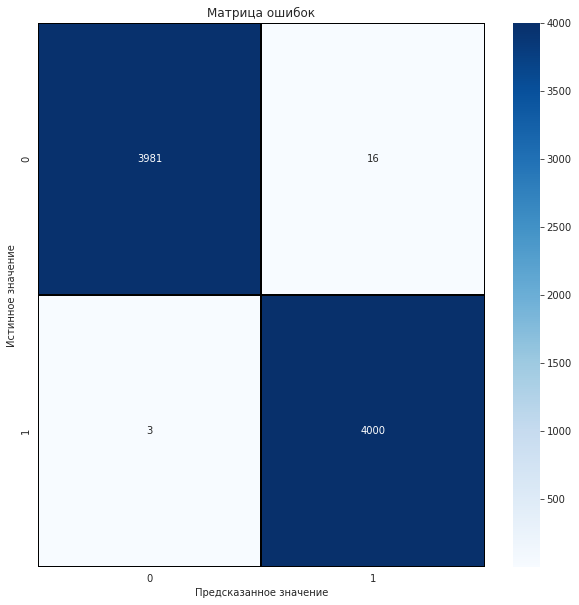

In [62]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap = "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel("Предсказанное значение")
plt.ylabel("Истинное значение")
plt.title("Матрица ошибок")
plt.show()  

### Истинный положительный результат (True Positive; TP):
Истинный положительный результат представляет собой значение правильных прогнозов положительных результатов из фактических положительных случаев. Из 4003 фактически положительных результатов 4000 правильно прогнозируются как положительные. Таким образом, значение True Positive равно 4000.
### Ложный положительный результат (FP; False Positive)
Ложное срабатывание представляет собой значение неверных положительных прогнозов. Это значение представляет количество отрицательных значений (из 3997), которые ложно прогнозируются как положительные. Из 3997 фактически отрицательных результатов 16 были ложно предсказаны как положительные. Таким образом, значение ложного срабатывания равно 16.
### Истинный отрицательный результат (TN; True Negative)
Истинное отрицательное значение представляет собой значение правильных прогнозов отрицательных значений из фактических отрицательных случаев. Из 3997 фактических отрицательных результатов 3981 правильно предсказанных отрицательных результатов. Таким образом, значение True Negative равно 3981.
### Ложный отрицательный результат (FN; False Negative)
Ложный отрицательный результат представляет собой значение неверных отрицательных прогнозов. Это значение представляет количество положительных результатов (из 4003), которые ложно прогнозируются как отрицательные. Из 4003 фактически положительных результатов 3 ложно предсказаны как отрицательные. Таким образом, значение False Negative равно 3. 

Модель сети работает одинаково для обоих классов в отношении метрик Precision, Recall и F1-меры.

### Precision (точность) 
Точность: оценка точности модели представляет собой способность модели правильно предсказывать положительные результаты из всех сделанных ей положительных прогнозов. Она представляет собой отношение между количеством положительных образцов, правильно классифицированных, к общему количеству образцов, классифицированных как положительные (правильно или неправильно).

### Precision Score = TP / (FP + TP)

###                 = 4000/( 16+4000)

###                 = 0.996

### Recall (полнота) 
Оценка полноты модели представляет собой способность модели правильно предсказывать положительные результаты из фактических положительных результатов.
Полнота рассчитывается как отношение количества положительных образцов, правильно классифицированных как положительные, к общему количеству положительных образцов.

### Recall score = TP/(TP+FN)

###                 = 3981/(3981+3)

###                 = 0.999

### Accuracy (точность измерений – доля правильных ответов)

Оценка точности модели представляет собой способность модели правильно прогнозировать как положительные, так и отрицательные стороны всех прогнозов.
Математически она представляет собой отношение суммы истинных положительных и истинных отрицательных значений ко всем предсказаниям.

### Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

###                = (4000+3981)/(3981+16+4000+3)

###                = 0.998

### F1-мера

Оценка модели F1 представляет оценку модели как функцию от метрик точности и полноты. F1-мера — это способ объединения точности и полноты модели, и она определяется как среднее гармоническое точности и полноты модели.

### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

###          = 2* 0.996*0.999/(0.996+0.999)

###          = 0.997

## Отчет о классификации

Отчет о классификации позволяет наблюдать за тем, для какого класса модель отработала лучше.

In [63]:
clr = classification_report(test_data.labels, y_pred2, target_names=["NEGATIVE", "POSITIVE"])
print(clr)

              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      3997
    POSITIVE       1.00      1.00      1.00      4003

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



Построена модель, точность которой близка к максимальной, поэтому приближенные значения всех метрик равны 1

## Проверка модели на входном изображении

In [64]:
# Загрузка изображения из входного файла (размер – 120 x 120)
img = keras.preprocessing.image.load_img('Negative/19857.jpg', target_size=(120, 120))

# Преобразование изображения к массиву
img1 = keras.preprocessing.image.img_to_array(img)

# Изменение размерности и масштабирование
img1 = np.expand_dims(img1,[0])
img1 = img1 / 255

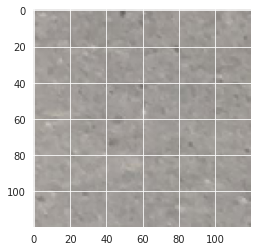

In [65]:
# Показать изображение 
plt.imshow(img)

In [66]:
# Вывести размерность изображения
print(img1.shape)

(1, 120, 120, 3)


In [68]:
# Определить функцию для определения веротности дефекта на изображении
# (предположительно, изображение содержит дефект, если отклик модели с 
# вероятностью дефекта на этом изображении не меньше значения в 50%)
def display_prediction_stats(prob):
  print("Вероятность дефекта: ", prob * 100, "%")
  if prob >= 0.5:
    print("Дефекты обнаружены!")
  else:
    print("Дефекты не обнаружены!")

In [70]:
# Проверить отклик модели на этом изображении
prediction = model.predict(img1)

# Отобразить результат проверки при помощи функции
display_prediction_stats(prediction[0][1])

Вероятность дефекта:  0.02638655132614076 %
Дефекты не обнаружены!


In [71]:
# Сохранить модель в *.h5-файл
model.save('model.h5')

## Плюсы и минусы итоговой модели CNN

### Плюсы
– С точки зрения производительности эта модель CNN очень эффективна по сравнению с другими моделями.

– Она проста в реализации и требует меньше параметров для построения

– Она может быть использована в различных областях и выполнять основные задачи, такие как распознавание лиц, анализ документов, прогнозирование климата, распознавание изображений и идентификация объектов.

### Минусы

– Переобучение — распространенная проблема при обучении модели, особенно когда недостаточно данных для обучения модели. Эта проблема может быть решена путем увеличения данных за счет аугментации.

– Еще одна распространенная проблема — потеря данных в процессе обучения. Это можно уменьшить, увеличив количество эпох и увеличив объем данных за счет аугментации.

– Если CNN имеет несколько слоев, то процесс обучения занимает много времени без современного графического процессора.